# Ejercicio 3

### Cargo la Red y la Dibujo, OJO NO CORRER TARDA MUCHO DIBUJARLA!!

In [ ]:
# Cargamos los archivos de datos sobre la red de internet
import matplotlib.pylab as plt
import networkx as nx
import numpy as np
import pandas as pd

G = nx.read_gml('as-22july06.gml')

#G = nx.Graph()
#G.add_edges_from(G)
nx.draw(G, node_size=1)
plt.show()

NO CORRER TARDA MUCHO DIBUJARLA!!

/usr/local/lib/python3.5/dist-packages/pandas/core/computation/__init__.py:18: UserWarning: The installed version of numexpr 2.4.3 is not supported in pandas and will be not be used
The minimum supported version is 2.4.6

  ver=ver, min_ver=_MIN_NUMEXPR_VERSION), UserWarning)


### Cargo la red y librerías (para no correr el de arriba que tarda) 

In [1]:
# Cargamos los archivos de datos sobre la red de internet
import matplotlib.pylab as plt
import networkx as nx
import numpy as np
import pandas as pd

G = nx.read_gml('as-22july06.gml')

/usr/local/lib/python3.5/dist-packages/pandas/core/computation/__init__.py:18: UserWarning: The installed version of numexpr 2.4.3 is not supported in pandas and will be not be used
The minimum supported version is 2.4.6

  ver=ver, min_ver=_MIN_NUMEXPR_VERSION), UserWarning)


### Armo la tira de grados de los nodos para hacer el histograma

In [2]:
grados_G = [gra for (nom,gra) in G.degree()] # [lo_que_quiero  for los_elementos in iterable]
Datos = np.asarray(grados_G)

#hist(x, bins=None, range=None, density=None, weights=None, cumulative=False, bottom=None, 
# histtype='bar', align='mid', orientation='vertical', rwidth=None, log=False, color=None, 
# label=None, stacked=False, normed=None, hold=None, data=None, **kwargs)

### Grafico histogramas con bin lineal en escalas lin-lin, lin-log, log-lin y log-log

In [4]:
#b='auto'
b=np.linspace(0,1000,1000)
plt.title("Linear Bins")
plt.subplot(221)
plt.hist(Datos, bins=b, density=True)
plt.subplot(222)
plt.hist(Datos, bins=b, density=True)
plt.xscale('log')
plt.subplot(223)
plt.hist(Datos, bins=b, density=True, log=True) 
#plt.yscale('log')
plt.subplot(224)
plt.hist(Datos, bins=b, density=True, log=True) 
plt.xscale('log')
#plt.yscale('log')
plt.show()
print(np.max(Datos))

AttributeError: Unknown property density

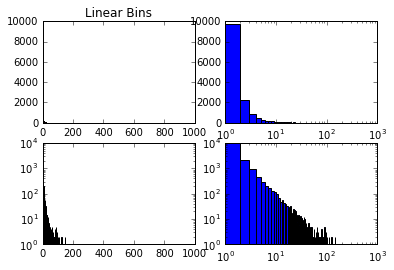

2390


In [5]:
#b='auto'
b=np.linspace(0,1000,1000)
plt.title("Linear Bins")
plt.subplot(221)
plt.hist(Datos, bins=b)
plt.subplot(222)
plt.hist(Datos, bins=b)
plt.xscale('log')
plt.subplot(223)
plt.hist(Datos, bins=b, log=True) 
#plt.yscale('log')
plt.subplot(224)
plt.hist(Datos, bins=b, log=True) 
plt.xscale('log')
#plt.yscale('log')
plt.show()
print(np.max(Datos))

### Grafico histogramas con bin log en escalas lin-lin, lin-log, log-lin y log-log

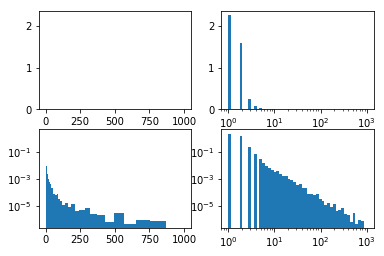

In [4]:
b=np.logspace(0,3,50)
plt.title("Linear Bins")
plt.subplot(221)
plt.hist(Datos, bins=b, density=True)
plt.subplot(222)
plt.hist(Datos, bins=b, density=True)
plt.xscale('log')
plt.subplot(223)
plt.hist(Datos, bins=b, density=True, log=True) 
#plt.yscale('log')
plt.subplot(224)
plt.hist(Datos, bins=b, density=True, log=True) 
plt.xscale('log')
#plt.yscale('log')
plt.show()

In [7]:
b=np.logspace(0,3,50)
print(b)

[    1.             1.1513954      1.32571137     1.52641797     1.75751062
     2.02358965     2.32995181     2.6826958      3.0888436      3.55648031
     4.09491506     4.71486636     5.42867544     6.25055193     7.19685673
     8.28642773     9.54095476    10.98541142    12.64855217    14.56348478
    16.76832937    19.30697729    22.22996483    25.59547923    29.47051703
    33.93221772    39.06939937    44.98432669    51.79474679    59.63623317
    68.6648845     79.06043211    91.0298178    104.81131342   120.67926406
   138.94954944   159.98587196   184.20699693   212.09508879   244.20530945
   281.1768698    323.74575428   372.75937203   429.19342601   494.17133613
   568.9866029    655.12855686   754.31200634   868.51137375  1000.        ]


# La escala log-log con bineado log es la que mejor representa el carácter libre de escala de la red.

## Ajuste del Kmin y gamma, gamma=2.09>2 => Libre de Escala!

2.087156668877868
5.0


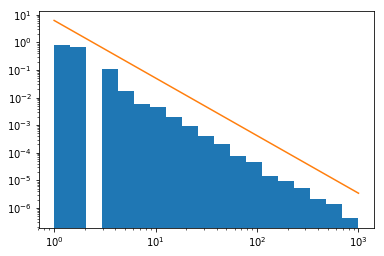

In [58]:
import igraph as ig
fit=ig.power_law_fit(Datos)
gamma=fit.alpha #Este es el exponente de la power law
Kmin=fit.xmin #Este el K_min
print(gamma)
print(Kmin)

b=np.logspace(0,3,20)
p=(gamma-1)/Kmin*(b/Kmin)**(-gamma)

plt.hist(Datos, bins=b, density=True, log=True) 
plt.xscale('log')
plt.plot(b,p)
plt.show()